In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from aqi_forecast import paths

In [3]:
data_path = paths.data_raw_dir() / "historical/ñielol-air-quality.csv"

In [4]:
import pandas as pd

df = pd.read_csv(data_path)

In [6]:
df.describe()

,date,pm25,pm10,no2,co
count,2572,2572,2572,2572,2572
unique,2572,193,103,24,35
top,2024/6/2,20,17,,
freq,1,61,133,1109,1751


In [7]:
df.dtypes

date     object
 pm25    object
 pm10    object
 no2     object
 co      object
dtype: object

In [8]:
df.head()

,date,pm25,pm10,no2,co
0,2024/6/2,34,29,,
1,2024/6/3,85,51,,
2,2024/6/4,134,23,,
3,2024/6/5,73,8,,
4,2024/6/6,32,10,,


In [23]:
def process_historical_data(df: pd.DataFrame) -> pd.DataFrame:
    df = df.rename(columns={" pm10": "pm10", " pm25": "pm25", " no2": "no2", " co": "co"})
    df["date"] = pd.to_datetime(df["date"], format="%Y/%m/%d")
    df["pm25"] = pd.to_numeric(df["pm25"], errors="coerce")
    df["pm10"] = pd.to_numeric(df["pm10"], errors="coerce")
    df["no2"] = pd.to_numeric(df["no2"], errors="coerce")
    df["co"] = pd.to_numeric(df["co"], errors="coerce")
    df.sort_values("date", inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

In [24]:
df = process_historical_data(df=df)

In [25]:
df

,date,pm25,pm10,no2,co
0,2017-05-25,NaN,66.0,NaN,NaN
1,2017-05-26,165.0,86.0,NaN,NaN
2,2017-05-27,187.0,79.0,NaN,NaN
3,2017-05-28,181.0,46.0,NaN,NaN
4,2017-05-29,134.0,43.0,NaN,NaN
...,...,...,...,...,...
2567,2024-06-16,45.0,20.0,NaN,NaN
2568,2024-06-17,68.0,9.0,NaN,NaN
2569,2024-06-18,33.0,14.0,NaN,NaN
2570,2024-06-19,32.0,12.0,NaN,NaN


Matplotlib is building the font cache; this may take a moment.


array([[<Axes: xlabel='date'>, <Axes: xlabel='date'>],
       [<Axes: xlabel='date'>, <Axes: xlabel='date'>]], dtype=object)

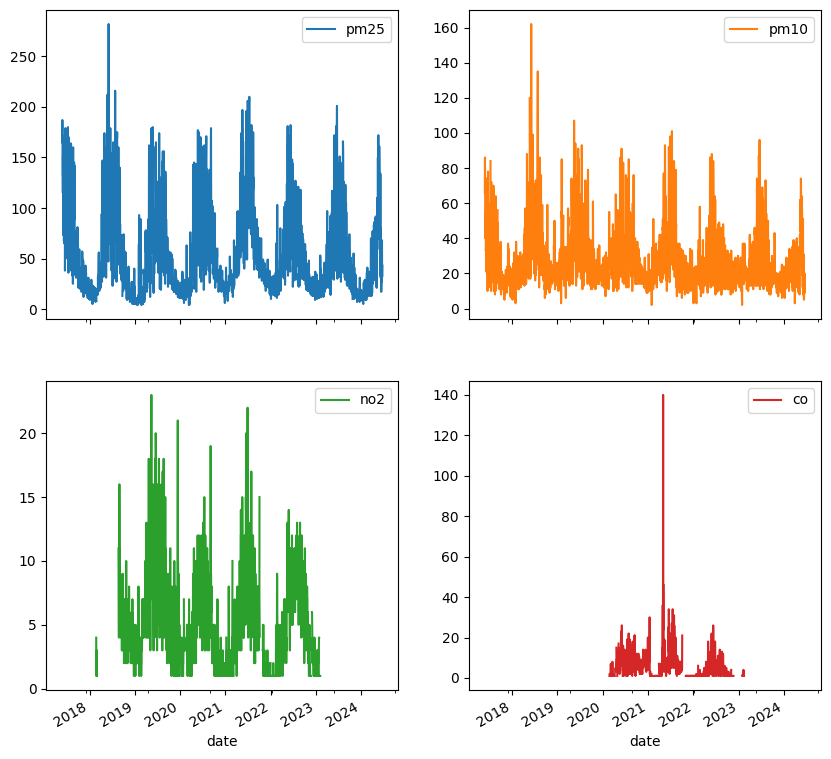

In [27]:
df.plot(x="date", y=["pm25", "pm10", "no2", "co"], subplots=True, layout=(2, 2), figsize=(10, 10))